In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyaf.ForecastEngine as autof

import yfinance as yf
yf.pdr_override()

In [2]:
stock = 'BA' # input
start = '2010-01-01' # input 
end = '2022-08-04'  # input
df = yf.download(stock, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Date
2010-01-04    43.777546
2010-01-05    45.211342
2010-01-06    46.582802
2010-01-07    48.468571
2010-01-08    48.001019
Name: Adj Close, dtype: float64

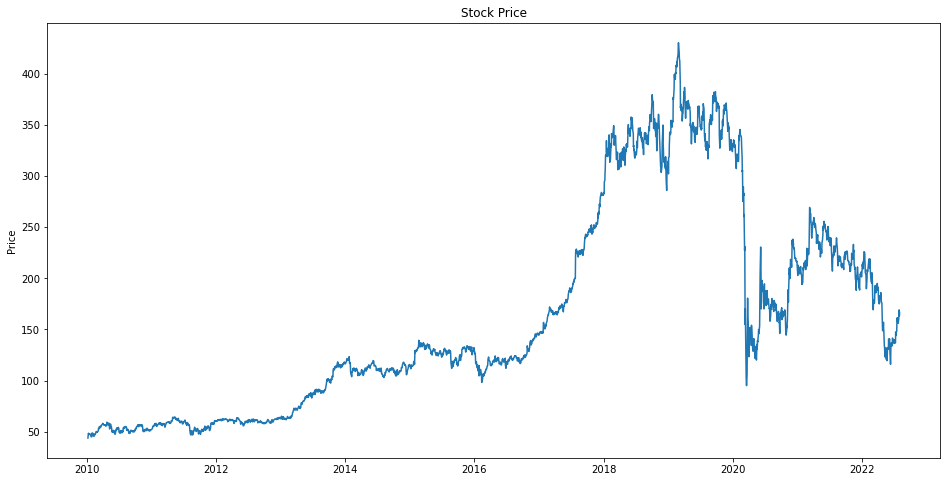

In [5]:
plt.figure(figsize=(16,8))
plt.plot(df)
plt.title('Stock Price')
plt.ylabel('Price')
plt.show()

In [6]:
df = df.reset_index()
df.tail()

,Date,Adj Close
3163,2022-07-28,159.089996
3164,2022-07-29,159.309998
3165,2022-08-01,169.070007
3166,2022-08-02,163.279999
3167,2022-08-03,166.639999


In [7]:
lEngine = autof.cForecastEngine()
lEngine.train(df , 'Date' , 'Adj Close', 7);

INFO:pyaf.timing:('OPERATION_START', ('SIGNAL_TRAINING', {'Signals': ['Adj Close'], 'Transformations': [('Adj Close', 'None', '_', 'T+S+R'), ('Adj Close', 'None', 'Diff_', 'T+S+R'), ('Adj Close', 'None', 'RelDiff_', 'T+S+R'), ('Adj Close', 'None', 'CumSum_', 'T+S+R')], 'Cores': 4}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Adj Close', 'Transformation': 'RelDiff_Adj Close'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Adj Close', 'Transformation': 'Diff_Adj Close'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Adj Close', 'Transformation': '_Adj Close'}))
INFO:pyaf.timing:('OPERATION_START', ('TRAINING', {'Signal': 'Adj Close', 'Transformation': 'CumSum_Adj Close'}))
/opt/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
/opt/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Se

In [8]:
df_forecast = lEngine.forecast(df, 7)

INFO:pyaf.timing:('OPERATION_START', ('FORECASTING', {'Signals': ['Adj Close'], 'Horizon': 7}))
INFO:pyaf.timing:('OPERATION_END_ELAPSED', 0.083, ('FORECASTING', {'Signals': ['Adj Close'], 'Horizon': 7}))


In [9]:
df_forecast[['Date' , 'Adj Close' , 'Adj Close_Forecast']].tail(7)

,Date,Adj Close,Adj Close_Forecast
3168,2022-08-04,NaN,166.639999
3169,2022-08-05,NaN,166.639999
3170,2022-08-06,NaN,166.639999
3171,2022-08-07,NaN,166.639999
3172,2022-08-08,NaN,166.639999
3173,2022-08-09,NaN,166.639999
3174,2022-08-10,NaN,166.639999


In [10]:
lEngine.getModelInfo()

INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2010-01-04T00:00:00.000000 TimeMax=2020-01-17T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Adj Close' Length=3168  Min=43.777546 Max=430.299988  Mean=161.425359 StdDev=100.347405
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Adj Close' Min=0.0 Max=1.0  Mean=0.304375 StdDev=0.259616
INFO:pyaf.std:DECOMPOSITION_TYPE 'T+S+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Adj Close_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR' [Lag1Trend + Cycle_None + NoAR]
INFO:pyaf.std:TREND_DETAIL '_Adj Close_Lag1Trend' [Lag1Trend]
INFO:pyaf.std:CYCLE_DETAIL '_Adj Close_Lag1Trend_residue_bestCycle_byMAPE' [Cycle_None]
INFO:pyaf.std:AUTOREG_DETAIL '_Adj Close_Lag1Trend_residue_bestCycle_byMAPE_residue_NoAR' [NoAR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.0113 MAPE_Forecast=0.0261 MAPE_Test=0.0199
INFO:pyaf.std:MODEL_SMAPE SMAPE_Fit=0.0113

<AxesSubplot:xlabel='Date'>

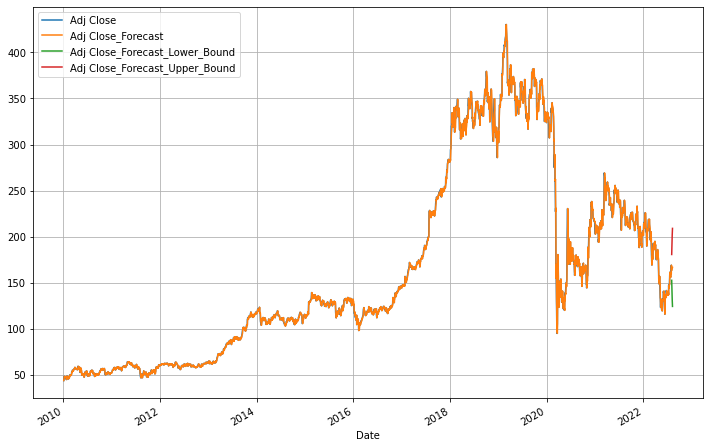

In [11]:
df_forecast.plot.line('Date', ['Adj Close' , 'Adj Close_Forecast', 
                                             'Adj Close_Forecast_Lower_Bound', 
                                             'Adj Close_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))